<a href="https://colab.research.google.com/github/martinpius/Computer-Vission/blob/main/CNN_VANILA_VGGNET_TURNED_SAMPLE_INCEPTION_ON_CIFAR_10_DATASET_TRAINING_LOOP_FROM_SCRATCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)
try:
  COLAB = True
  import tensorflow as tf
  print(f"You are using google colab with tensorflow version: {tf.__version__}")
except Exception as e:
  COLAB = False
  print(f"{type(e)}--{e}\n...please load your drive...")
def time_fmt(t: float = 123.9871)->float:
  h = int(t / (60 * 60))
  m = int(t % (60 * 60) / 60)
  s = int(t % 60)
  return f"{h}: {m:>02}: {s:>05.2f}"
print(f"....testing....testinng....testing\ntime elapse is {time_fmt(3600.97)}")


Mounted at /content/drive
You are using google colab with tensorflow version: 2.4.1
....testing....testinng....testing
time elapse is 1: 00: 00.00


In [ ]:
import numpy as np
from matplotlib.pyplot import imshow
import time, os
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
#Loading the data from keras:

In [ ]:
def load_dataset():
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
  return x_train, x_test, y_train, y_test

In [ ]:
#Preprocess the data:
def data_preprocess():
  x_train, x_test, y_train, y_test = load_dataset()
  x_train = x_train.astype(np.float32)/255.0
  x_test = x_test.astype(np.float32)/255.0
  y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
  y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)
  return x_train, x_test, y_train, y_test


In [ ]:
#Convert to tensorflow data-types
def _to_tensorflow_data(batch_size: int = 128, epochs: int = 50, BUFFER:int= 1024):
  x_train, x_test, y_train, y_test = data_preprocess()
  train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
  train_data = train_data.shuffle(BUFFER).batch(batch_size = batch_size, drop_remainder = True)
  validation_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
  validation_data = validation_data.shuffle(BUFFER).batch(batch_size = batch_size, drop_remainder = True)
  return train_data, validation_data

In [ ]:
#Model building: CNN-VANILA, simple_VGGNET, simple_Inception

In [ ]:
class CNN_Mixtures:
  
  def __init__(self, input_shape):
    self.input_shape = input_shape

  def cnn_vanila(self):
    inputs = tf.keras.Input(shape = self.input_shape)
    x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',padding = 'same')(inputs)
    x = tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(x)
    x = tf.keras.layers.Dropout(rate = 0.25)(x)
    x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(x)
    x = tf.keras.layers.Dropout(rate = 0.25)(x)
    x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(x)
    x = tf.keras.layers.Dropout(rate = 0.25)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(units = 128, activation = 'relu')(x)
    outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax')(x)
    model = tf.keras.Model(inputs = inputs, outputs = outputs)
    return model

  def inception_simple(self):
    inputs = tf.keras.Input(shape = self.input_shape)
    x = tf.keras.layers.Conv2D(filters  = 32, kernel_size = (3,3), padding = 'same', activation = 'relu')(inputs)
    x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu')(x)
    out1 = tf.keras.layers.Dropout(rate = 0.25)(x)

    x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
    tf.keras.layers.Dropout(rate = 0.25)(x)
    block1 = tf.keras.layers.concatenate([x, out1])

    x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(block1)
    x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.Dropout(rate = 0.25)(x)
    block2 = tf.keras.layers.concatenate([x, block1])

    x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(block2)
    x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.Dropout(rate = 0.25)(x)
    block3 = tf.keras.layers.concatenate([x, block2])

    x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(block3)
    x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(x)
    x = tf.keras.layers.Dropout(rate = 0.25)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(units = 1024, activation = 'relu')(x)
    x = tf.keras.layers.Dropout(rate = 0.5)(x)
    x = tf.keras.layers.Dense(units = 128, activation = 'relu')(x)
    outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax',name = 'outputs')(x)
    model = tf.keras.Model(inputs = inputs, outputs = outputs)
    return model
  
  def call(self, model_choice = True):
    if model_choice:
      simple_vggnet = self.cnn_vanila()
    else:
      simple_inception = self.inception_simple()
    return simple_vggnet, simple_inception


In [ ]:
#testing the class
cnn_mixture = CNN_Mixtures(input_shape = (32,32,3))

In [ ]:
vggnet = cnn_mixture.cnn_vanila()

In [ ]:
vggnet.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 128)       1475

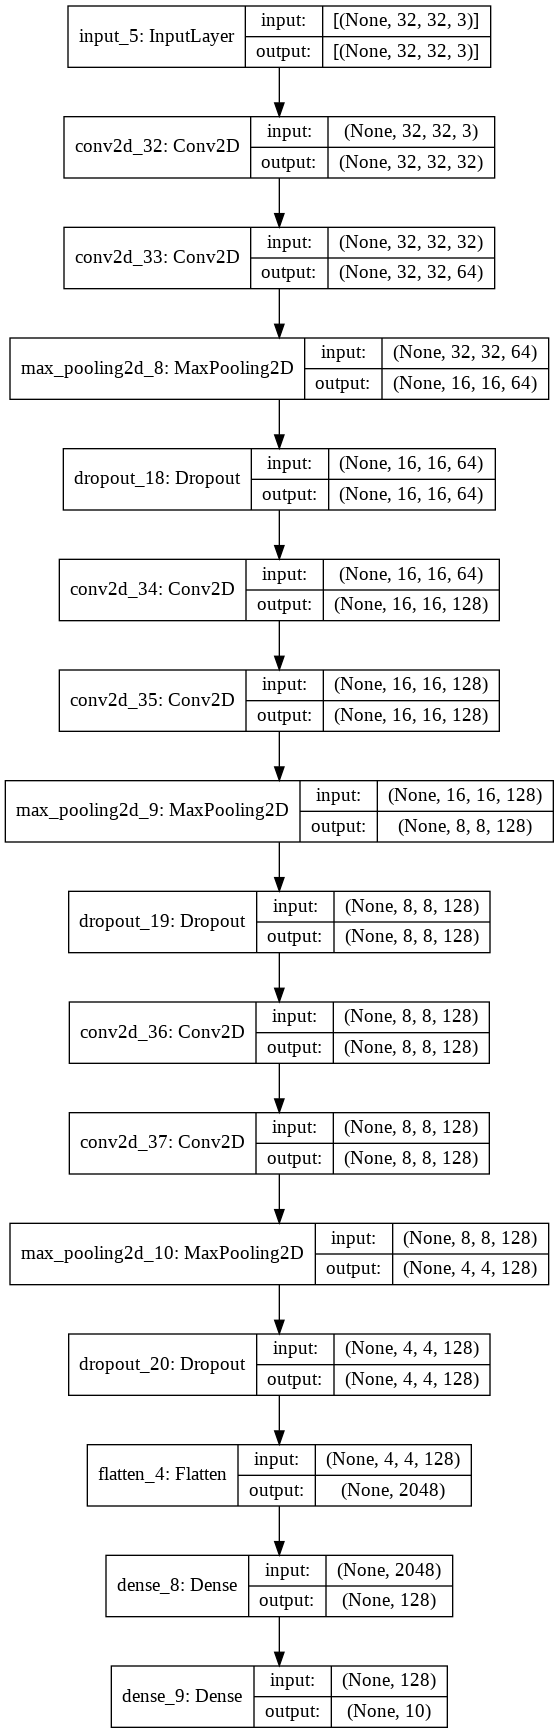

In [ ]:
tf.keras.utils.plot_model(model = vggnet, to_file = 'vggnet.png', show_shapes = True)

In [ ]:
inception = cnn_mixture.inception_simple()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 32, 32, 32)   896         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 32, 32, 64)   18496       conv2d_38[0][0]                  
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 32, 32, 128)  73856       conv2d_39[0][0]                  
____________________________________________________________________________________________

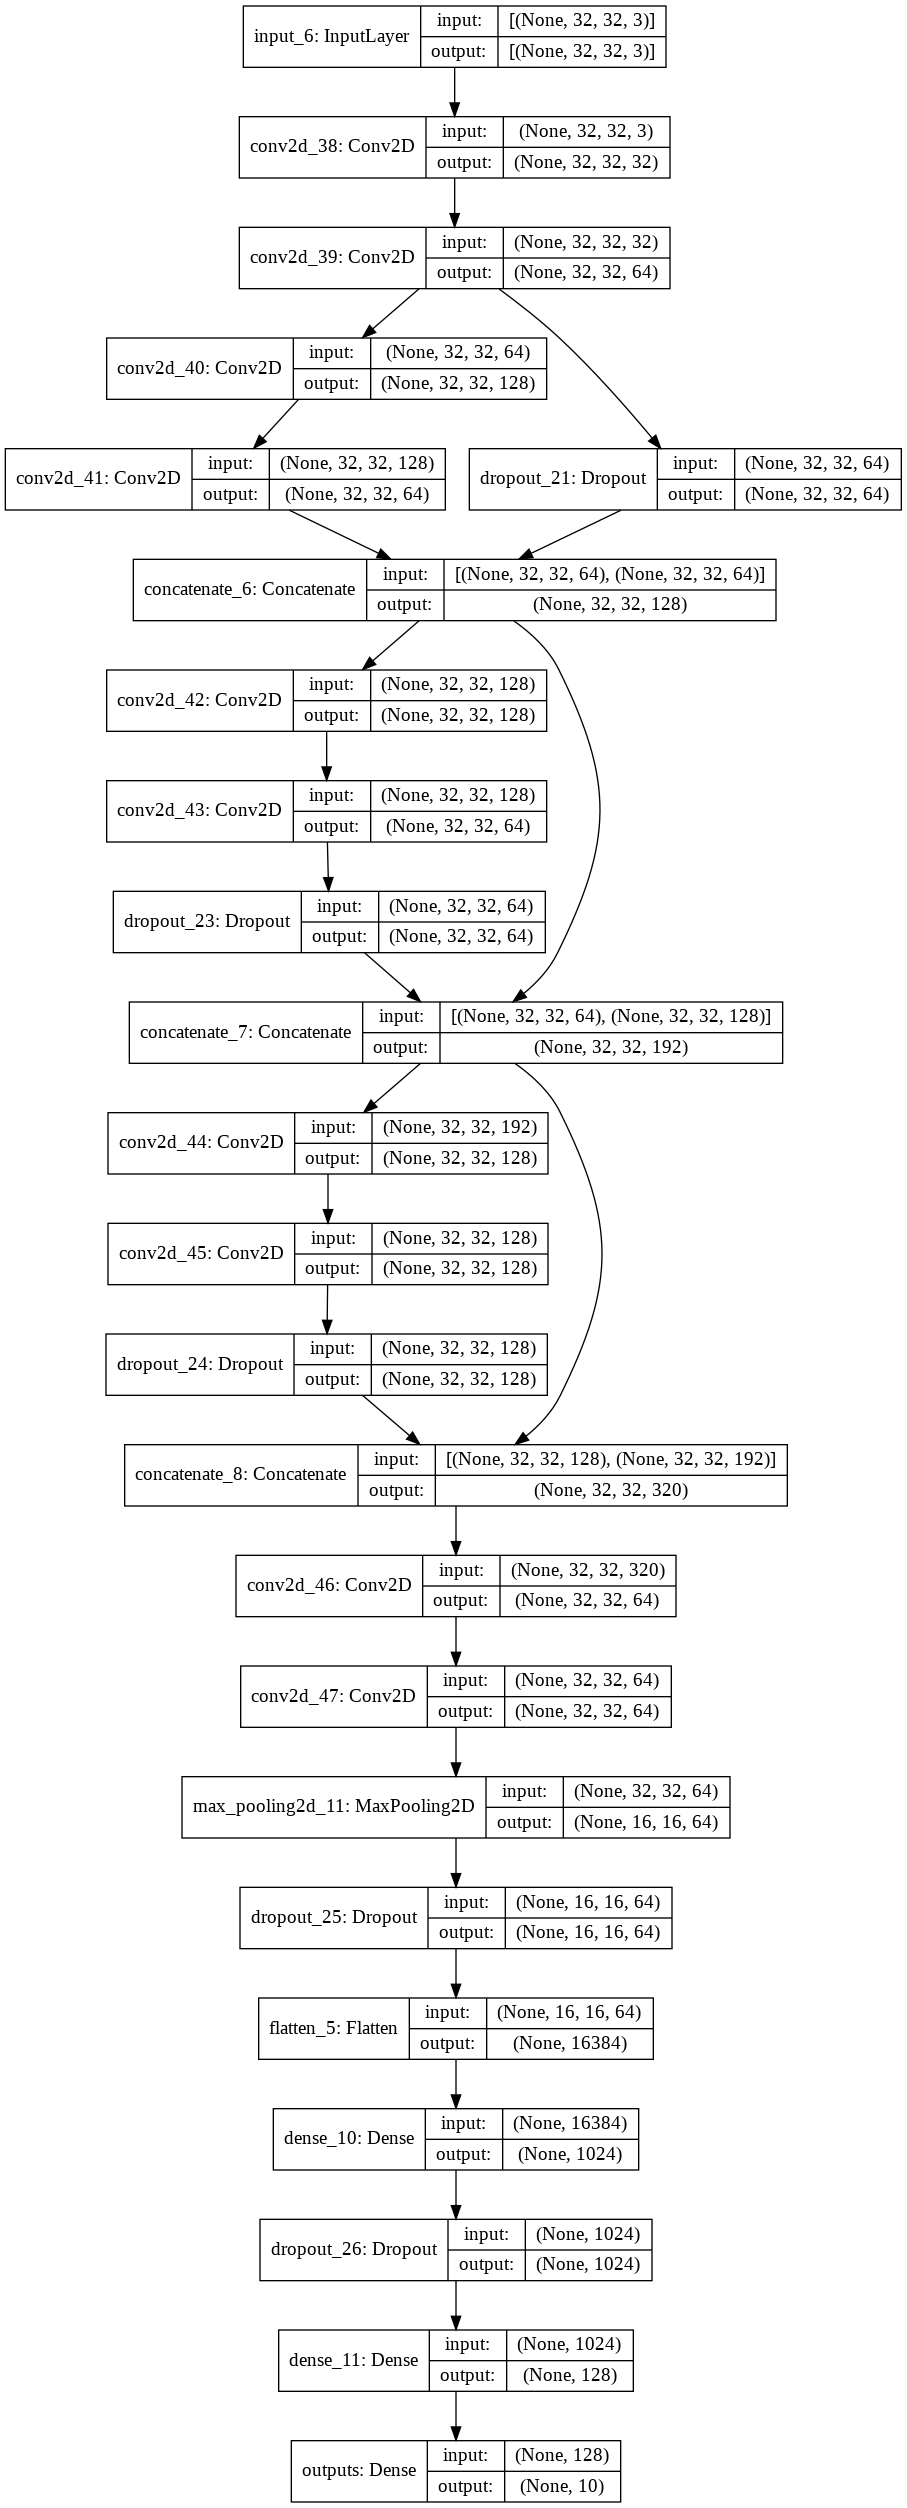

In [ ]:
inception.summary()
tf.keras.utils.plot_model(model = inception, to_file = 'inception_sample.png', show_shapes = True)

In [ ]:
#compile and training the models

In [ ]:
def compile_train(model, x_train, y_train,x_test,y_test):

  model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
  history = model.fit(x_train, y_train, validation_data = (x_test, y_test), 
                      verbose = 2, epochs = 50, batch_size = 128)
  _, acc_score = model.evaluate(x_test, y_test, verbose = 1)
  return history,acc_score


In [ ]:
#Printing the history:
class Model_History:
  def __init__(self, model_hist):
    self.model_hist = model_hist

  def display_losses(self):
    plt.style.use('ggplot')
    plt.subplot(211)
    plt.title('Cross entropy loss and accuracy for the model')
    plt.plot(self.model_hist.history['loss'], label = 'train_loss', color = 'red')
    plt.plot(self.model_hist.history['val_loss'], label = 'validation_loss', color = 'blue')
    plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left', title = 'loss')
  
  def display_accuracy(self):
    plt.style.use('ggplot')
    plt.subplot(212)
    plt.plot(self.model_hist.history['accuracy'], label = 'train_accuracy', color = 'red')
    plt.plot(self.model_hist.history['val_accuracy'], label = 'validation_accuracy', color = 'blue')
    plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left', title = 'accuracy')


In [ ]:
def _reload_model():
  x_train, x_test, y_train, y_test = data_preprocess()
  my_model_pack = CNN_Mixtures(input_shape = (32,32,3))
  model1 = my_model_pack.cnn_vanila()
  history1, acc1 = compile_train(model = model1, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test)
  print()
  model2 = my_model_pack.inception_simple()
  history2, acc2 = compile_train(model = model2, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test)
  return history1, history2, acc1, acc2

In [ ]:
tic = time.time()
print(f"....training....please wait......\n")
history1, history2, acc1, acc2 = _reload_model()


....training....please wait......

Epoch 1/50
391/391 - 8s - loss: 1.6486 - accuracy: 0.3899 - val_loss: 1.2693 - val_accuracy: 0.5459
Epoch 2/50
391/391 - 7s - loss: 1.1295 - accuracy: 0.5958 - val_loss: 0.9795 - val_accuracy: 0.6558
Epoch 3/50
391/391 - 7s - loss: 0.9156 - accuracy: 0.6788 - val_loss: 0.8179 - val_accuracy: 0.7170
Epoch 4/50
391/391 - 7s - loss: 0.7757 - accuracy: 0.7251 - val_loss: 0.7225 - val_accuracy: 0.7462
Epoch 5/50
391/391 - 7s - loss: 0.6825 - accuracy: 0.7614 - val_loss: 0.7189 - val_accuracy: 0.7511
Epoch 6/50
391/391 - 7s - loss: 0.6109 - accuracy: 0.7859 - val_loss: 0.6623 - val_accuracy: 0.7733
Epoch 7/50
391/391 - 7s - loss: 0.5532 - accuracy: 0.8042 - val_loss: 0.6220 - val_accuracy: 0.7894
Epoch 8/50
391/391 - 7s - loss: 0.5038 - accuracy: 0.8223 - val_loss: 0.6032 - val_accuracy: 0.7944
Epoch 9/50
391/391 - 7s - loss: 0.4725 - accuracy: 0.8323 - val_loss: 0.6078 - val_accuracy: 0.7981
Epoch 10/50
391/391 - 7s - loss: 0.4351 - accuracy: 0.8465 - val_


the accuracy score for vggnet model is 82.789999 percent

the accuracy score for a simple inception is 76.78 percent

total time is: 1: 11: 06.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


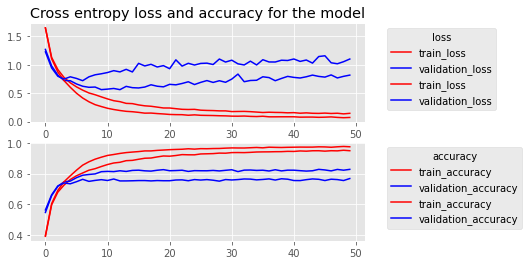

In [ ]:
model_hist1 = Model_History(history1)
model_hist1.display_losses()
model_hist1.display_accuracy()
print(f"\nthe accuracy score for vggnet model is {acc1*100:2f} percent")
model_hist2 = Model_History(history2)
model_hist2.display_losses()
model_hist2.display_accuracy()
print(f"\nthe accuracy score for a simple inception is {acc2*100:.2f} percent")
toc = time.time()
print(f"\ntotal time is: {time_fmt(toc - tic)}")
